basic neural network for classification of breast cancer

importing teh dependences

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as skd
from sklearn.model_selection import train_test_split

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


data collection AND processing

In [2]:
breast_cancer_data = skd.load_breast_cancer()
print(breast_cancer_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:
data_frame = pd.DataFrame(breast_cancer_data.data, columns = breast_cancer_data.feature_names)

data_frame.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


adding a column in my table

In [4]:
data_frame["label_new"] = breast_cancer_data.target

data_frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label_new
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
data_frame.shape

(569, 31)

In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# checking the missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label_new                  0
dtype: int64

In [8]:
# statisitical measure about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label_new
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
# checking the distrubution of taret variable
data_frame['label_new'].value_counts()

label_new
1    357
0    212
Name: count, dtype: int64

In [10]:
data_frame.groupby('label_new').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label_new,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


separating the feature and tragets

In [11]:
x = data_frame.drop(columns = 'label_new', axis = 1)
y = data_frame['label_new']


In [12]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

spliting the data into training and testing data

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2)

In [14]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (455, 30) (114, 30)


bulding the neural network

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)#so that we can get same
from tensorflow import keras

In [ ]:
#setting out the layers for nerual network
# number of neuron in input layer of NN is equal to the number of features present in the NN
model = keras.Sequential([
  keras.layers.Flatten(input_shape = (30,)),#this is the input layers|| input_shape = ((30, ))is the number of features present
  keras.layers.Dense(20,activation = 'relu'),#this is the hidden layers || here you can set the no. of neuron
  keras.layers.Dense(20,activation = 'relu'),
  keras.layers.Dense(20,activation = 'relu'),
  keras.layers.Dense(2, activation = "sigmoid")#this is the output layers|| her the no. of neuron should be fix whic should depend on the expected ans
    ])#here we will stack our layers of NN

In [ ]:
# complie the NN
model.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics =['accuracy'])

dog = 0
cat = 1
horse = 2


now if you are classifying the out in the integer the you will be use the loss as parase_categorical_crossentropy



else,


if you are classifying :


cat = [1 0 0]
dog = [0 1 0]


in a binary form then it will loss will be onehot_catogerical_entropgy

In [ ]:
history = model.fit(x_train, y_train,validation_split = 0.1, epochs = 20)

Epoch 1/20
13/13 [==============================] - 1s 24ms/step - loss: 28.4911 - accuracy: 0.3936 - val_loss: 5.8248 - val_accuracy: 0.1304
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 5.0894 - accuracy: 0.3839 - val_loss: 3.6698 - val_accuracy: 0.3696
Epoch 3/20
13/13 [==============================] - 0s 8ms/step - loss: 1.7819 - accuracy: 0.5330 - val_loss: 1.3550 - val_accuracy: 0.4348
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 1.0202 - accuracy: 0.6308 - val_loss: 0.4989 - val_accuracy: 0.7609
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.4714 - accuracy: 0.8166 - val_loss: 0.2553 - val_accuracy: 0.8913
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.2951 - accuracy: 0.8998 - val_loss: 0.2325 - val_accuracy: 0.9348
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.8949 - val_loss: 0.2120 - val_accuracy: 0.9130
Epoch 8/20
13/13 [

standardize the data


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train_std  = scaler.fit_transform(x_train)
y_test_std = scaler.transform(x_test)

visualizing the accuracy and loss

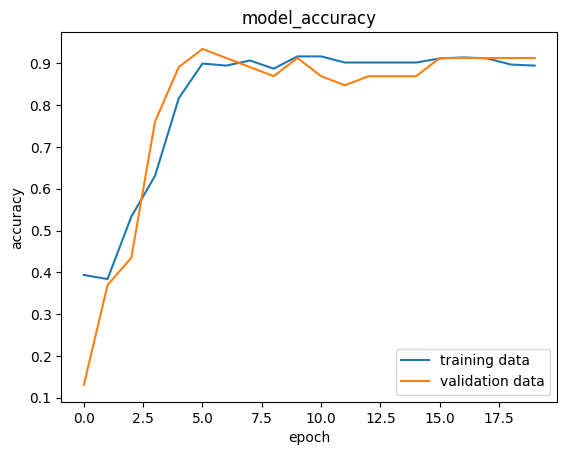

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("model_accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'best')

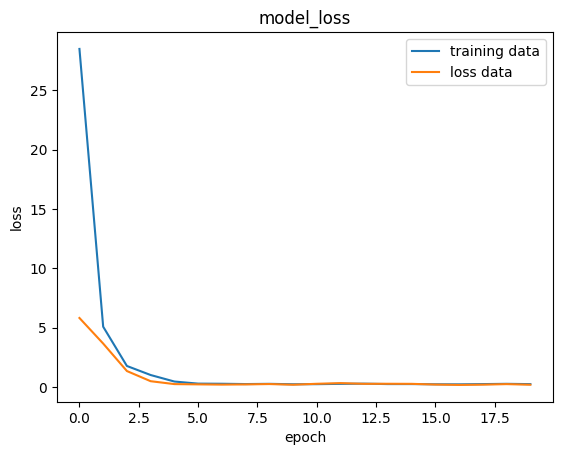

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("model_loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'loss data'], loc = 'best')

accuracy of the model on the data


In [ ]:
loss, accuracy = model.evaluate(y_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.5806 - accuracy: 0.7719
0.7719298005104065


In [ ]:
print(y_test_std.shape)
print(y_test_std[0])

(114, 30)
[-0.62163677  2.01418713 -0.64165689 -0.6164159  -0.87272286 -0.79036202
 -0.62794768 -0.77947804 -0.71753374 -0.22096003 -0.77009885  0.84243527
 -0.67133608 -0.57588253  0.10893163  0.02436643 -0.09850539 -0.43505401
 -0.37683558  0.22571621 -0.67574765  1.90527312 -0.67829687 -0.63855475
 -0.50131894 -0.4434938  -0.45485571 -0.6769939  -0.75017632 -0.09307902]


In [ ]:
y_pre = model.predict(y_test_std)

4/4 [==============================] - 0s 4ms/step


In [ ]:
print(y_pre.shape)
print(y_pre[1])#the first integer show the probability of being "0" and second show the probability of "1"

(114, 2)
[0.45533702 0.57610345]


In [ ]:
print(y_pre)

[[0.4874342  0.5577244 ]
 [0.45533702 0.57610345]
 [0.48462212 0.53035283]
 [0.44415346 0.59871703]
 [0.55027616 0.490317  ]
 [0.4686814  0.5335812 ]
 [0.423171   0.61844563]
 [0.53281325 0.47203955]
 [0.48617625 0.5567002 ]
 [0.5245317  0.5005531 ]
 [0.5523803  0.44310743]
 [0.44957915 0.5718641 ]
 [0.6927316  0.47185752]
 [0.4876069  0.5477156 ]
 [0.43670982 0.5979176 ]
 [0.5996684  0.44682884]
 [0.44398707 0.5945957 ]
 [0.7229088  0.37548757]
 [0.5204279  0.4703827 ]
 [0.45764118 0.59467036]
 [0.462764   0.55075204]
 [0.48215735 0.5867681 ]
 [0.46116415 0.57431555]
 [0.4597868  0.5632993 ]
 [0.45072222 0.5708599 ]
 [0.44127628 0.57974327]
 [0.45089707 0.5835484 ]
 [0.44035158 0.54683036]
 [0.49723402 0.5512247 ]
 [0.5292966  0.36598036]
 [0.51483434 0.6099495 ]
 [0.45276695 0.575372  ]
 [0.48315573 0.5553923 ]
 [0.47828752 0.53950983]
 [0.4860521  0.525226  ]
 [0.5316891  0.6427075 ]
 [0.62382036 0.51259995]
 [0.47347897 0.55206627]
 [0.45695442 0.57122844]
 [0.439549   0.54768497]


In [ ]:
# argmax function
my_list = [30, 20, 30]
index_of_max = np.argmax(my_list)
print(my_list)
print(index_of_max)

[30, 20, 30]
0


In [ ]:
# converting the predictio probability to clas lables
y_pre_lables = [np.argmax(i) for i in y_pre]
print(y_pre_lables)

[1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
